# Decision Tree Classification

In [11]:
df = read.csv("../Social_Network_Ads.csv")
df = df[3:5]

In [12]:
# transformar variable y a factor (al profe se lo pidieron, yo hice todo sin ello y me funcionó, lo dejo aqui por si acaso en un futuro me sale el error)
# actualizacion: ahora lo usé xD, me tiraba error al intentar usar y_pred = predict(..., type = "class")
df$Purchased = factor(df$Purchased, levels=c (0, 1))

In [13]:
# divido el conjunto en entrenamiento y testing
library(caTools)
set.seed(123)
split = sample.split(df$Purchased, SplitRatio = 1/4)
trainSet = subset(df, split==FALSE) 
testSet = subset(df, split==TRUE) 

In [14]:
# dado que las variables tienen magnitudes muy diferentes (edades y sueldos), hay que escalarlas pa dejarlas en la misma escala
# trainSet[1:2] = scale(trainSet[1:2])
# testSet[1:2] = scale(testSet[1:2])

In [15]:
# hacemos la clasificacion con la libreria previamente usada "rpart" (recursive partitioning and regresion trees)
library(rpart) 
clasificador = rpart(formula = Purchased~.,
                    data = trainSet)

In [16]:
# predecimos los resultados
y_pred = predict(clasificador, newdata = testSet)

In [17]:
# notemos que obtuvimos predicciones con decimales, pero nosotros queremos solo 1's y 0's,
# podriamos transformarlos manualmente, pero podemos hacerlo automagicamente con el parámetro type="class"
y_pred = predict(clasificador, newdata = testSet, 
                type = "class")
y_pred

6  16  27  30  31  44  49  50  53  55  56  60  61  62  64  67  70  72  73  76 
  0   0   1   0   0   0   1   0   0   0   0   1   0   0   1   0   0   0   0   1 
 79  92  94  99 100 105 110 111 116 118 130 133 136 145 147 149 150 151 167 168 
  0   1   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0 
169 171 172 173 174 179 180 184 186 194 196 198 203 205 209 212 217 221 222 223 
  1   0   1   1   0   0   0   0   0   0   0   0   1   1   1   1   1   0   0   1 
231 233 240 248 249 250 252 262 270 271 276 279 280 282 283 285 289 304 313 322 
  1   1   1   1   0   1   0   1   0   1   1   1   1   0   0   1   0   0   0   1 
329 333 334 338 342 344 345 350 355 356 370 375 377 384 386 387 393 397 398 399 
  1   0   0   0   0   1   1   0   1   1   1   0   1   1   1   1   1   1   1   0 
Levels: 0 1

In [18]:
# creamos la matriz de confusion para ver que tan buena es nuestra clasificacion
y_test = testSet[, 3]
confMatrix = table(y_test, y_pred)
confMatrix

      y_pred
y_test  0  1
     0 56  8
     1  3 33

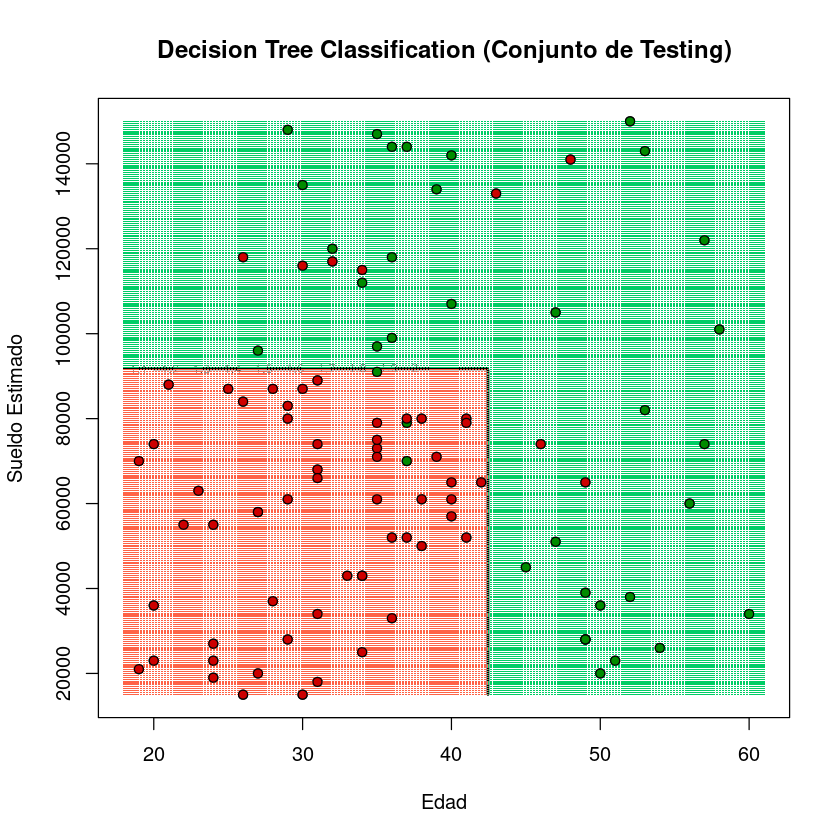

In [19]:
# nuevamente, no encontré una mejor forma de graficar esto en R asi que lo copio del curso ml a-z
# Visualización del conjunto de testing
set = testSet
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.1)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 500)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(clasificador, newdata=grid_set, type="class")
plot(set[, -3],
     main = 'Decision Tree Classification (Conjunto de Testing)',
     xlab = 'Edad', ylab = 'Sueldo Estimado',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))
# se me demora unos 45 segundos

a diferencia de python aqui no vemos overfiting, tal vez demasiado poco fitting, pero se ve weno

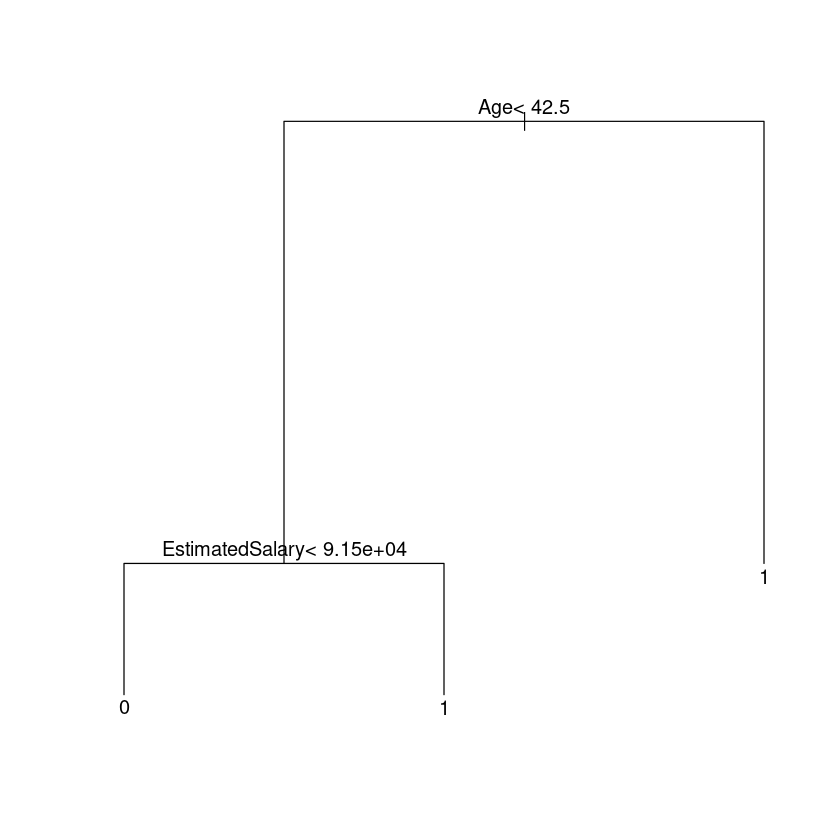

In [20]:
# tambien podemos plotear las ramitas
plot(clasificador)
text(clasificador)

lo que nos dice esto es que:  
si tiene más de 42.5 años se predice que la persona compra    
si tiene menos de 42.5 años pero tiene más de 91500 dolares (asumamos que son dolares) de sueldo entonces se predice que tambien compran  
pero si tiene menos de 42.5 años y menos de 91500 dolares de sueldo entonces se predice que no compran  